In [9]:
import pandas as pd

# load csv to dataframes for the data/ut_contaienr_data/power_meter_202405221209.csv

file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'
df = pd.read_csv(file_path)
df.columns


Index(['id', 'timestamp', 'active_energy_import', 'active_energy_export',
       'reactive_energy_import', 'reactive_energy_export', 'current_l1',
       'current_l2', 'current_l3', 'active_power', 'active_power_l1',
       'active_power_l2', 'active_power_l3', 'grid_frequency', 'voltage_l1',
       'voltage_l2', 'voltage_l3'],
      dtype='object')

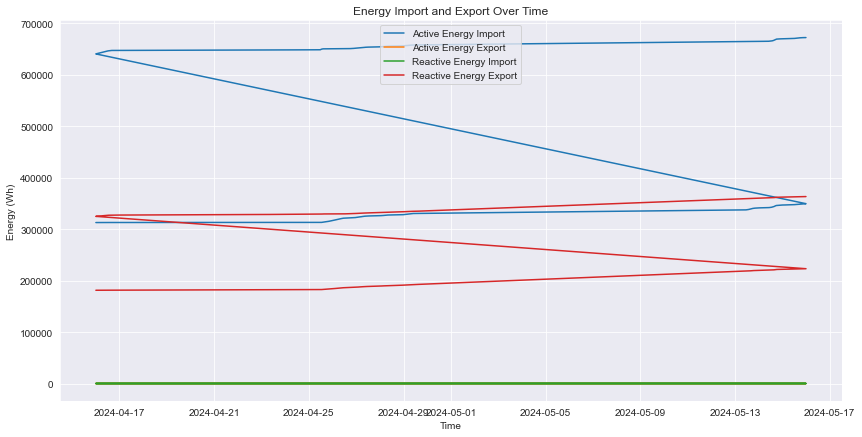

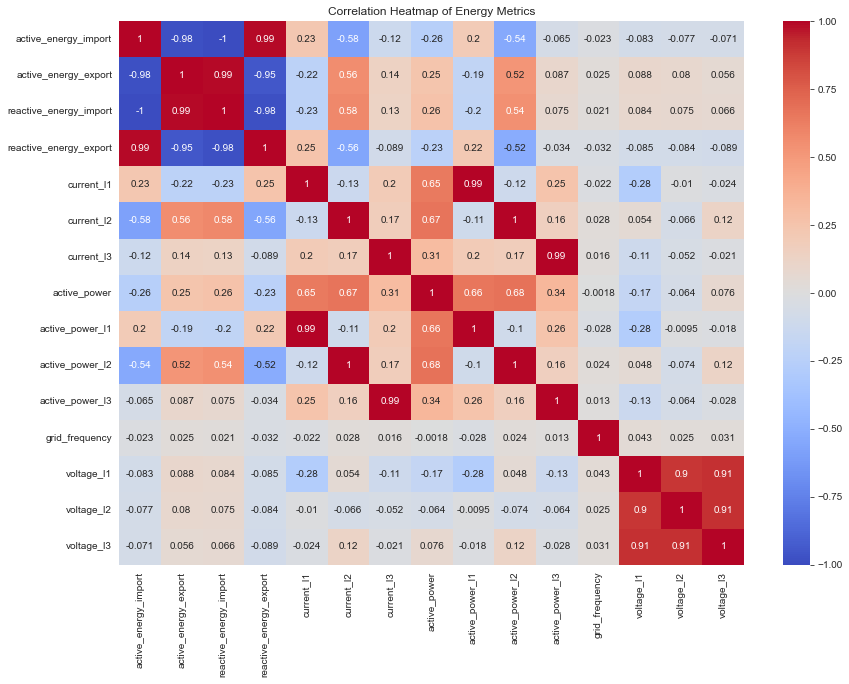

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a DataFrame
file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'
df = pd.read_csv(file_path)

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with NaT in 'timestamp' column
df = df.dropna(subset=['timestamp'])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Convert relevant columns to numpy arrays for plotting
time_values = df.index.to_numpy()
active_energy_import_values = df['active_energy_import'].to_numpy()
active_energy_export_values = df['active_energy_export'].to_numpy()
reactive_energy_import_values = df['reactive_energy_import'].to_numpy()
reactive_energy_export_values = df['reactive_energy_export'].to_numpy()
voltage_l1_values = df['voltage_l1'].dropna().to_numpy()
voltage_l2_values = df['voltage_l2'].dropna().to_numpy()
voltage_l3_values = df['voltage_l3'].dropna().to_numpy()

# Time Series Plot: Active and Reactive Energy
plt.figure(figsize=(14, 7))
plt.plot(time_values, active_energy_import_values, label='Active Energy Import')
plt.plot(time_values, active_energy_export_values, label='Active Energy Export')
plt.plot(time_values, reactive_energy_import_values, label='Reactive Energy Import')
plt.plot(time_values, reactive_energy_export_values, label='Reactive Energy Export')
plt.title('Energy Import and Export Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

# Correlation Heatmap: To see the correlation between different metrics
plt.figure(figsize=(14, 10))
correlation_matrix = df[['active_energy_import', 'active_energy_export', 'reactive_energy_import', 'reactive_energy_export', 'current_l1', 'current_l2', 'current_l3', 'active_power', 'active_power_l1', 'active_power_l2', 'active_power_l3', 'grid_frequency', 'voltage_l1', 'voltage_l2', 'voltage_l3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Energy Metrics')
plt.show()


# Corellation between power and usage

In [18]:
env_file_path_ut = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
env_file_path_test = 'data/test_customer/environment_202405221206.csv'  # Update this path

df_env_ut = pd.read_csv(env_file_path_ut)
df_env_test = pd.read_csv(env_file_path_test)


power_file_path_ut = 'data/ut_contaienr_data/power_meter_202405221209.csv'  # Update this path
power_file_path_test = 'data/test_customer/power_meter_202405221204.csv'  # Update this path

df_power_ut = pd.read_csv(power_file_path_ut)
df_power_test = pd.read_csv(power_file_path_test)

#columns of all dataframes
print(df_env_ut.columns)
print(df_env_test.columns)
print(df_power_ut.columns)
print(df_power_test.columns)

C:\Users\david\AppData\Local\Temp\ipykernel_35416\751172104.py:5: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_env_test = pd.read_csv(env_file_path_test)


Index(['id', 'timestamp', 'co2', 'temperature', 'humidity', 'motion',
       'water_meter', 'controller_input_0', 'controller_input_1',
       'controller_output_0', 'controller_output_1', 'position_coordinates',
       'position_altitude', 'cellular_signal_quality', 'bluetooth_devices'],
      dtype='object')
Index(['id', 'timestamp', 'co2', 'temperature', 'humidity', 'motion',
       'water_meter', 'controller_input_0', 'controller_input_1',
       'controller_output_0', 'controller_output_1', 'cellular_signal_quality',
       'bluetooth_devices'],
      dtype='object')
Index(['id', 'timestamp', 'active_energy_import', 'active_energy_export',
       'reactive_energy_import', 'reactive_energy_export', 'current_l1',
       'current_l2', 'current_l3', 'active_power', 'active_power_l1',
       'active_power_l2', 'active_power_l3', 'grid_frequency', 'voltage_l1',
       'voltage_l2', 'voltage_l3'],
      dtype='object')
Index(['id', 'timestamp', 'active_energy_import', 'active_energy_expo

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the environment CSV data into a DataFrame
# env_file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
env_file_path = 'data/test_customer/environment_202405221206.csv'  # Update this path
df_env = pd.read_csv(env_file_path)

# Load the power CSV data into a DataFrame
# power_file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'  # Update this path
power_file_path = 'data/test_customer/power_meter_202405221204.csv'  # Update this path
df_power = pd.read_csv(power_file_path)

# Convert the 'timestamp' columns to datetime
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
df_power['timestamp'] = pd.to_datetime(df_power['timestamp'], errors='coerce')

# Drop rows with NaT in 'timestamp' columns
df_env = df_env.dropna(subset=['timestamp'])
df_power = df_power.dropna(subset=['timestamp'])

# Set the timestamp columns as the index
df_env.set_index('timestamp', inplace=True)
df_power.set_index('timestamp', inplace=True)

# Ensure the index is of type DatetimeIndex
df_env.index = pd.to_datetime(df_env.index)
df_power.index = pd.to_datetime(df_power.index)

# Fill NaN values in 'motion', 'controller_output_0', 'controller_output_1', 'controller_input_1', and 'controller_input_0' columns with False and convert to int
df_env['motion'] = df_env['motion'].fillna(False).astype(int)
df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
df_env['controller_output_0'] = df_env['controller_output_0'].fillna(False).astype(int)  # AC status
df_env['controller_output_1'] = df_env['controller_output_1'].fillna(False).astype(int)  # Heating status
df_env['controller_input_0'] = df_env['controller_input_0'].fillna(False).astype(int)  # Window sensor

# Rename the columns accordingly
df_env.rename(columns={
    'controller_input_1': 'motion_sensor',
    'controller_output_0': 'AC',
    'controller_output_1': 'heating',
    'controller_input_0': 'window'
}, inplace=True)

# Resample the environment data to 15-minute intervals and aggregate
resampled_env = df_env.resample('15T').agg({
    'co2': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'motion': 'sum',
    'motion_sensor': 'sum',
    'AC': 'sum',
    'heating': 'sum',
    'window': 'sum'  # Window state
})

# Resample the power data to 15-minute intervals and aggregate
resampled_power = df_power.resample('15T').agg({
    'active_energy_import': 'sum',
    'active_power': 'mean'
})

# Merge the environment and power dataframes on the timestamp
merged_df = pd.merge(resampled_env, resampled_power, left_index=True, right_index=True, how='inner')

# Create a correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Sensor Measurements and Power Usage for Container ID 10')
plt.show()

# Display the correlation matrix
print(correlation_matrix)


C:\Users\david\AppData\Local\Temp\ipykernel_35416\905117147.py:8: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_env = pd.read_csv(env_file_path)
C:\Users\david\AppData\Local\Temp\ipykernel_35416\905117147.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
C:\Users\david\AppData\Local\Temp\ipykernel_35416\905117147.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `obj

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 204644

# How much energy consumption can be reduced using temperature sensors to HVAC?

1. Baseline Energy Consumption Analysis
First, we'll analyze the existing data to understand the baseline energy consumption when the HVAC is not controlled by temperature sensors.

2. Modeling Temperature-Controlled HVAC
Develop a model to simulate how the HVAC system would behave if controlled by temperature sensors. This involves creating a control strategy that turns the HVAC on or off based on temperature thresholds.

3. Comparison and Analysis
Compare the energy consumption in both scenarios to estimate potential energy savings.

Step 2: Modeling Temperature-Controlled HVAC
Simulate a simple temperature control strategy and estimate the energy consumption.

Baseline Energy Consumption (Wh): 10346.0
AC Controlled On Count: 9
Heating Controlled On Count: 7
Total Controlled Energy Consumption (Wh): 7125.0
Energy Savings (Wh): 3221.0
Percentage Energy Savings: 31.13%


C:\Users\david\AppData\Local\Temp\ipykernel_35416\1243765231.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_env['motion'] = df_env['motion'].fillna(False).astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_35416\1243765231.py:48: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = df_env.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\1243765231.py:63: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = df_power.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\1243765231.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

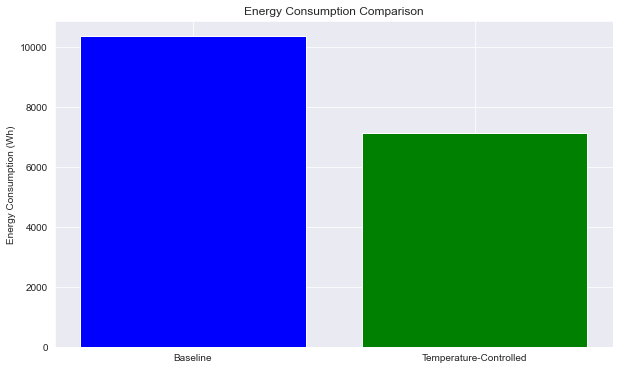

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the environment CSV data into a DataFrame
env_file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
df_env = pd.read_csv(env_file_path)

# Load the power CSV data into a DataFrame
power_file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'  # Update this path
df_power = pd.read_csv(power_file_path)

# Convert the 'timestamp' columns to datetime
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
df_power['timestamp'] = pd.to_datetime(df_power['timestamp'], errors='coerce')

# Filter both dataframes for container ID 10
df_env = df_env[df_env['id'] == 10]
df_power = df_power[df_power['id'] == 10]

# Drop rows with NaT in 'timestamp' columns
df_env = df_env.dropna(subset=['timestamp'])
df_power = df_power.dropna(subset=['timestamp'])

# Set the timestamp columns as the index
df_env.set_index('timestamp', inplace=True)
df_power.set_index('timestamp', inplace=True)

# Ensure the index is of type DatetimeIndex
df_env.index = pd.to_datetime(df_env.index)
df_power.index = pd.to_datetime(df_power.index)

# Fill NaN values in 'motion', 'controller_output_0', 'controller_output_1', and 'controller_input_1' columns with False and convert to int
df_env['motion'] = df_env['motion'].fillna(False).astype(int)
df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
df_env['controller_output_0'] = df_env['controller_output_0'].fillna(False).astype(int)  # AC status
df_env['controller_output_1'] = df_env['controller_output_1'].fillna(False).astype(int)  # Heating status
df_env['controller_input_0'] = df_env['controller_input_0'].fillna(False).astype(int)  # Window sensor

# Rename the columns accordingly
df_env.rename(columns={
    'controller_input_1': 'motion_sensor',
    'controller_output_0': 'AC',
    'controller_output_1': 'heating',
    'controller_input_0': 'window'
}, inplace=True)

# Resample the environment data to 15-minute intervals and aggregate
resampled_env = df_env.resample('15T').agg({
    'co2': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'motion': 'sum',
    'motion_sensor': 'sum',
    'AC': 'sum',
    'heating': 'sum',
    'window': 'sum'
})

# Calculate the difference in cumulative active energy import to get the actual energy consumption per interval
df_power['active_energy_diff'] = df_power['active_energy_import'].diff().fillna(0)

# Resample the power data to 15-minute intervals and aggregate
resampled_power = df_power.resample('15T').agg({
    'active_energy_diff': 'sum',  # Use the difference in active energy import
    'active_power': 'mean'
})

# Merge the environment and power dataframes on the timestamp
merged_df = pd.merge(resampled_env, resampled_power, left_index=True, right_index=True, how='inner')

# Filter data to include only intervals with movement
filtered_df = merged_df[(merged_df['motion'] > 0) | (merged_df['motion_sensor'] > 0)]

# Calculate baseline energy consumption (in watt-hours)
baseline_energy_consumption = filtered_df['active_energy_diff'].sum()  # Total energy consumption
print(f"Baseline Energy Consumption (Wh): {baseline_energy_consumption}")

# Define temperature thresholds
upper_threshold = 25  # Upper threshold for AC
lower_threshold = 18  # Lower threshold for heating

# Simulate HVAC control based on temperature
filtered_df['AC_controlled'] = filtered_df['temperature'].apply(lambda x: 1 if x > upper_threshold else 0)
filtered_df['heating_controlled'] = filtered_df['temperature'].apply(lambda x: 1 if x < lower_threshold else 0)

# Debugging: Print controlled AC and heating counts
print(f"AC Controlled On Count: {filtered_df['AC_controlled'].sum()}")
print(f"Heating Controlled On Count: {filtered_df['heating_controlled'].sum()}")

# Assume some average power usage for AC and heating
average_ac_power = 2000  # in watts
average_heating_power = 1500  # in watts

# Calculate energy consumption based on controlled HVAC
filtered_df['AC_energy'] = filtered_df['AC_controlled'] * average_ac_power * 15 / 60  # convert to Wh
filtered_df['heating_energy'] = filtered_df['heating_controlled'] * average_heating_power * 15 / 60  # convert to Wh

# Calculate total controlled energy consumption
total_controlled_energy = filtered_df['AC_energy'].sum() + filtered_df['heating_energy'].sum()
print(f"Total Controlled Energy Consumption (Wh): {total_controlled_energy}")

# Calculate potential energy savings
energy_savings = baseline_energy_consumption - total_controlled_energy
percentage_savings = (energy_savings / baseline_energy_consumption) * 100

print(f"Energy Savings (Wh): {energy_savings}")
print(f"Percentage Energy Savings: {percentage_savings:.2f}%")

# Convert data to numpy arrays for plotting
time_values = filtered_df.index.to_numpy()
baseline_energy_values = filtered_df['active_energy_diff'].to_numpy()
controlled_energy_values = (filtered_df['AC_energy'] + filtered_df['heating_energy']).to_numpy()

# Plot energy consumption comparison
labels = ['Baseline', 'Temperature-Controlled']
energy_values = [baseline_energy_consumption, total_controlled_energy]

plt.figure(figsize=(10, 6))
plt.bar(labels, energy_values, color=['blue', 'green'])
plt.title('Energy Consumption Comparison')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

# # Plot energy consumption over time
# plt.figure(figsize=(14, 7))
# plt.plot(time_values, baseline_energy_values, label='Baseline Energy Consumption (Wh)')
# plt.plot(time_values, controlled_energy_values, label='Controlled Energy Consumption (Wh)')
# plt.title('Energy Consumption Over Time')
# plt.xlabel('Time')
# plt.ylabel('Energy Consumption (Wh)')
# plt.legend()
# plt.show()


# same but for test customer

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the environment CSV data into a DataFrame
env_file_path = 'data/test_customer/environment_202405221206.csv'  # Update this path
df_env = pd.read_csv(env_file_path, low_memory=False)

# Load the power CSV data into a DataFrame
power_file_path = 'data/test_customer/power_meter_202405221204.csv'  # Update this path
df_power = pd.read_csv(power_file_path, low_memory=False)

# Convert the 'timestamp' columns to datetime with UTC
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce', utc=True)
df_power['timestamp'] = pd.to_datetime(df_power['timestamp'], errors='coerce', utc=True)

# Drop rows with NaT in 'timestamp' columns
df_env = df_env.dropna(subset=['timestamp'])
df_power = df_power.dropna(subset=['timestamp'])

# Set the timestamp columns as the index
df_env.set_index('timestamp', inplace=True)
df_power.set_index('timestamp', inplace=True)

# Fill NaN values in 'motion', 'controller_output_0', 'controller_output_1', 'controller_input_1', and 'controller_input_0' columns with False and convert to int
df_env['motion'] = df_env['motion'].fillna(False).astype(int)
df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
df_env['controller_output_0'] = df_env['controller_output_0'].fillna(False).astype(int)  # AC status
df_env['controller_output_1'] = df_env['controller_output_1'].fillna(False).astype(int)  # Heating status
df_env['controller_input_0'] = df_env['controller_input_0'].fillna(False).astype(int)  # Window sensor

# Rename the columns accordingly
df_env.rename(columns={
    'controller_input_1': 'motion_sensor',
    'controller_output_0': 'AC',
    'controller_output_1': 'heating',
    'controller_input_0': 'window'
}, inplace=True)

# Ensure numeric columns are in the correct data types
numeric_columns = ['co2', 'temperature', 'humidity', 'active_energy_import', 'active_power']
df_env[numeric_columns[:3]] = df_env[numeric_columns[:3]].apply(pd.to_numeric, errors='coerce')
df_power[numeric_columns[3:]] = df_power[numeric_columns[3:]].apply(pd.to_numeric, errors='coerce')

# Function to analyze energy savings for each container
def analyze_container(container_id, filter_movement=False):
    # Filter dataframes for the specific container ID
    env_data = df_env[df_env['id'] == container_id]
    power_data = df_power[df_power['id'] == container_id]

    # Handle non-increasing active_energy_import values
    power_data = power_data.sort_index()
    power_data['active_energy_import'] = power_data['active_energy_import'].mask(power_data['active_energy_import'] < power_data['active_energy_import'].shift(1))
    power_data['active_energy_diff'] = power_data['active_energy_import'].diff().fillna(0)

    # Resample the environment data to 15-minute intervals and aggregate
    resampled_env = env_data.resample('15T').agg({
        'co2': 'mean',
        'temperature': 'mean',
        'humidity': 'mean',
        'motion': 'sum',
        'motion_sensor': 'sum',
        'AC': 'sum',
        'heating': 'sum',
        'window': 'sum'
    })

    # Resample the power data to 15-minute intervals and aggregate
    resampled_power = power_data.resample('15T').agg({
        'active_energy_diff': 'sum',  # Use the difference in active energy import
        'active_power': 'mean'
    })

    # Merge the environment and power dataframes on the timestamp
    merged_df = pd.merge(resampled_env, resampled_power, left_index=True, right_index=True, how='inner')

    # Optionally filter data based on movement
    if filter_movement:
        merged_df = merged_df[merged_df['motion_sensor'] > 0]

    # Calculate baseline energy consumption (in watt-hours)
    baseline_energy_consumption = merged_df['active_energy_diff'].sum()  # Total energy consumption

    # Define temperature thresholds
    upper_threshold = 25  # Upper threshold for AC
    lower_threshold = 18  # Lower threshold for heating

    # Simulate HVAC control based on temperature
    merged_df['AC_controlled'] = merged_df['temperature'].apply(lambda x: 1 if x > upper_threshold else 0)
    merged_df['heating_controlled'] = merged_df['temperature'].apply(lambda x: 1 if x < lower_threshold else 0)

    # Assume some average power usage for AC and heating
    average_ac_power = 2000  # in watts
    average_heating_power = 1500  # in watts

    # Calculate energy consumption based on controlled HVAC
    merged_df['AC_energy'] = merged_df['AC_controlled'] * average_ac_power * 15 / 60  # convert to Wh
    merged_df['heating_energy'] = merged_df['heating_controlled'] * average_heating_power * 15 / 60  # convert to Wh

    # Calculate total controlled energy consumption
    total_controlled_energy = merged_df['AC_energy'].sum() + merged_df['heating_energy'].sum()

    # Calculate potential energy savings
    energy_savings = baseline_energy_consumption - total_controlled_energy
    percentage_savings = (energy_savings / baseline_energy_consumption) * 100 if baseline_energy_consumption > 0 else 0

    print(f"Container ID: {container_id}")
    print(f"Baseline Energy Consumption (Wh): {baseline_energy_consumption}")
    print(f"Total Controlled Energy Consumption (Wh): {total_controlled_energy}")
    print(f"Energy Savings (Wh): {energy_savings}")
    print(f"Percentage Energy Savings: {percentage_savings:.2f}%")
    print("-" * 50)

    return {
        'container_id': container_id,
        'baseline_energy': baseline_energy_consumption,
        'controlled_energy': total_controlled_energy,
        'energy_savings': energy_savings,
        'percentage_savings': percentage_savings
    }



C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_env['motion'] = df_env['motion'].fillna(False).astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will ch

C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({


Container ID: 5
Baseline Energy Consumption (Wh): 2014520.0
Total Controlled Energy Consumption (Wh): 4244875.0
Energy Savings (Wh): -2230355.0
Percentage Energy Savings: -110.71%
--------------------------------------------------


C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({


Container ID: 6
Baseline Energy Consumption (Wh): 2364788.0
Total Controlled Energy Consumption (Wh): 3438625.0
Energy Savings (Wh): -1073837.0
Percentage Energy Savings: -45.41%
--------------------------------------------------


C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({


Container ID: 1
Baseline Energy Consumption (Wh): 2910032.0
Total Controlled Energy Consumption (Wh): 4702250.0
Energy Savings (Wh): -1792218.0
Percentage Energy Savings: -61.59%
--------------------------------------------------


C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({


Container ID: 2
Baseline Energy Consumption (Wh): 1424954.0
Total Controlled Energy Consumption (Wh): 3216625.0
Energy Savings (Wh): -1791671.0
Percentage Energy Savings: -125.74%
--------------------------------------------------


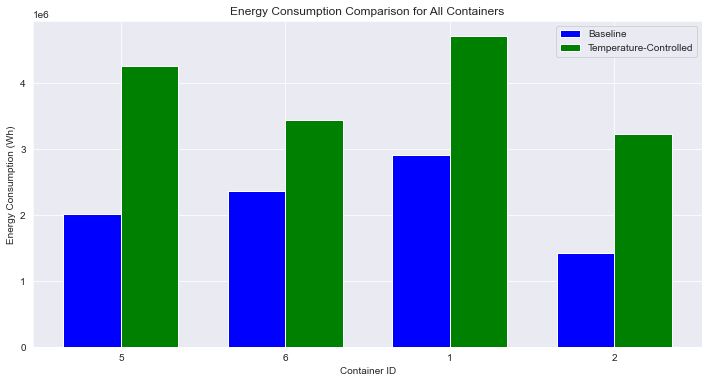

In [43]:
import numpy as np

# Analyze energy savings for all containers
results = []
for container_id in df_env['id'].unique():
    result = analyze_container(container_id, filter_movement=False)  # Change filter_movement to True if you want to filter based on movement
    results.append(result)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot overall energy consumption comparison for all containers
bar_width = 0.35  # Width of the bars

# Generate positions for the baseline and controlled bars
index = np.arange(len(results_df['container_id']))

plt.figure(figsize=(12, 6))
plt.bar(index, results_df['baseline_energy'], bar_width, label='Baseline', color='blue')
plt.bar(index + bar_width, results_df['controlled_energy'], bar_width, label='Temperature-Controlled', color='green')
plt.title('Energy Consumption Comparison for All Containers')
plt.xlabel('Container ID')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(index + bar_width / 2, results_df['container_id'])
plt.legend()
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({


Container ID: 5
Baseline Energy Consumption (Wh): 960582.0
Total Controlled Energy Consumption (Wh): 1795750.0
Energy Savings (Wh): -835168.0
Percentage Energy Savings: -86.94%
--------------------------------------------------
Container ID: 6
Baseline Energy Consumption (Wh): 722358.0
Total Controlled Energy Consumption (Wh): 866500.0
Energy Savings (Wh): -144142.0
Percentage Energy Savings: -19.95%
--------------------------------------------------


C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = power_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:56: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = env_data.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\2923376980.py:68: FutureWarning: 'T' is deprecated and will be removed in 

Container ID: 1
Baseline Energy Consumption (Wh): 1123147.0
Total Controlled Energy Consumption (Wh): 979875.0
Energy Savings (Wh): 143272.0
Percentage Energy Savings: 12.76%
--------------------------------------------------
Container ID: 2
Baseline Energy Consumption (Wh): 388993.0
Total Controlled Energy Consumption (Wh): 857250.0
Energy Savings (Wh): -468257.0
Percentage Energy Savings: -120.38%
--------------------------------------------------


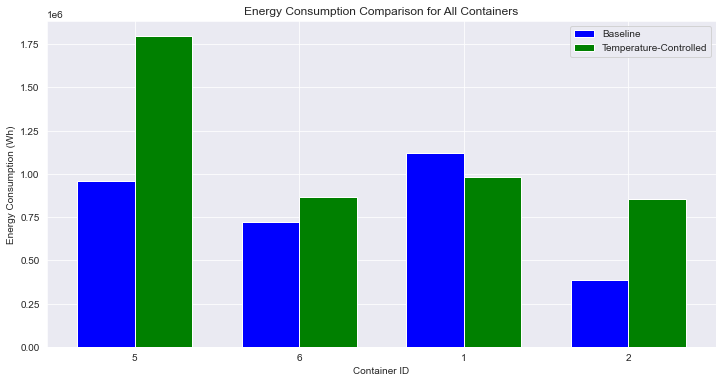

In [44]:
import numpy as np

# Analyze energy savings for all containers
results = []
for container_id in df_env['id'].unique():
    result = analyze_container(container_id, filter_movement=True)  # Change filter_movement to True if you want to filter based on movement
    results.append(result)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot overall energy consumption comparison for all containers
bar_width = 0.35  # Width of the bars

# Generate positions for the baseline and controlled bars
index = np.arange(len(results_df['container_id']))

plt.figure(figsize=(12, 6))
plt.bar(index, results_df['baseline_energy'], bar_width, label='Baseline', color='blue')
plt.bar(index + bar_width, results_df['controlled_energy'], bar_width, label='Temperature-Controlled', color='green')
plt.title('Energy Consumption Comparison for All Containers')
plt.xlabel('Container ID')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(index + bar_width / 2, results_df['container_id'])
plt.legend()
plt.show()